In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
color_pal = sns.color_palette("bright")
plt.style.use('ggplot')

In [2]:
# 1.60 / 3.78

In [3]:
df = pd.read_csv('E:\\Downloads\\automobile\\auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


mpg - Miles Per Gallon
1 Mile = 1.60934 kms
1 Gallon = 3.78541 Litres

Displacement: 
An internal-combustion engine's displacement is the combined volume of air moved — or displaced
— by the pistons in its cylinders.

Weight: It's basically the weight of the vehicle and we have it here in Pounds
1 lbs = 0.453592 kg

Acceleration:
A car's acceleration is calculated when the car is not in motion (0 mph), until the amount of time 
it takes to reach a velocity of 60 miles per hour. This means that the initial velocity is zero and
the final velocity is 60 miles per hour (26.82 meters per second).
In our case, 96.5604 KMPH

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# df['horsepower'].values

In [7]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [1]:
p =  df.loc[~(df['horsepower'] == '?')]
plt.figure(figsize=(10,7))

# plt.subplot(2,2,1)
# ax1 = sns.histplot(data = p, x='cylinders', color=color_pal[0])
# plt.subplot(2,2,2) 
# ax2 = sns.histplot(data = p, x='displacement', color=color_pal[1])
# plt.subplot(2,2,3) 
# ax3 = sns.histplot(data = p, x='weight', color=color_pal[2])
# plt.subplot(2,2,4) 
# ax4 = sns.histplot(data = p, x='acceleration', color=color_pal[3])

# plt.tight_layout() 
# plt.show() 

for i, n in enumerate(['cylinders', 'displacement', 'mpg', 'acceleration']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=p, x=n, color=color_pal[i])
    plt.xlabel(n.title())
plt.suptitle('Histograms of Variables', fontsize=18)
plt.tight_layout() 
plt.show()     

NameError: name 'df' is not defined

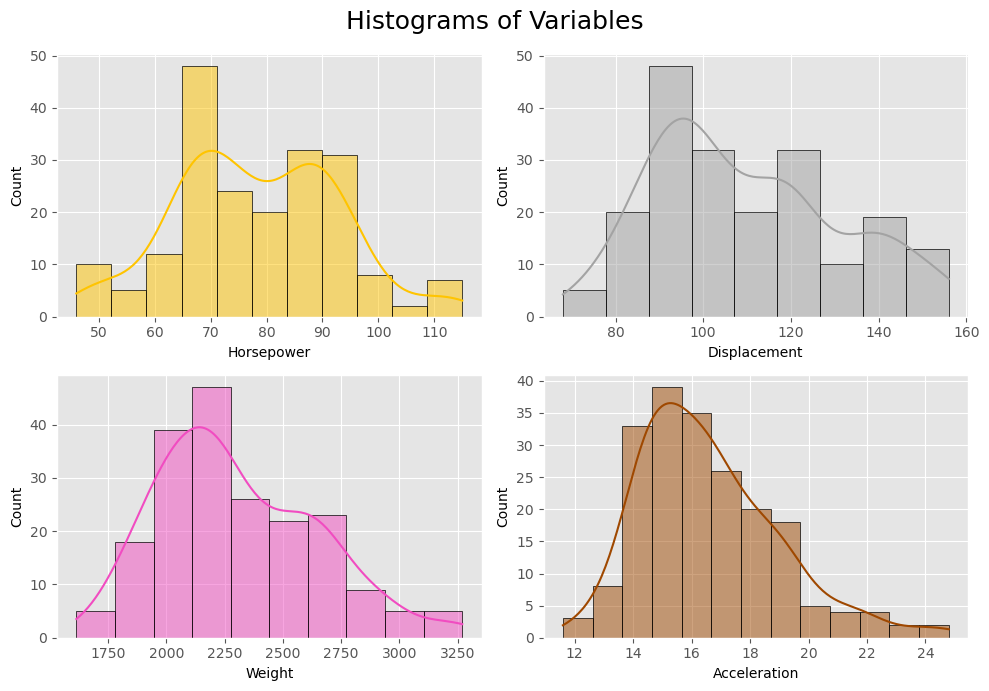

In [10]:
q = df.loc[(df['cylinders'] == 4) & (df['horsepower'] != '?')].copy() 
q['horsepower'] = q['horsepower'].astype(int)

plt.figure(figsize=(10,7))

for i, n in enumerate(['horsepower', 'displacement', 'weight', 'acceleration']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=q, x=n, color=color_pal[-(i+2)], kde=True, edgecolor='black')
    plt.xlabel(n.title())
    
plt.suptitle('Histograms of Variables', fontsize=18)
plt.tight_layout() 
plt.show()     

### Based on above assumptions, we'll be replacing '?' in HORSEPOWER with mean

In [11]:
df['horsepower'] = df['horsepower'].str.replace('?', '78', regex=True)
df['horsepower'] = df['horsepower'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.070352,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.335455,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
df['mpg'] = (df['mpg'] * 1.60934 / 3.78541).astype(int)
df.rename(columns={'mpg': 'kmpl'}, inplace=True)

df['weight'] = (df['weight'] * 0.453592).astype(int)

In [14]:
df.columns

Index(['kmpl', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [15]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,7,8,307.0,130,1589,12.0,70,1,chevrolet chevelle malibu
1,6,8,350.0,165,1675,11.5,70,1,buick skylark 320
2,7,8,318.0,150,1558,11.0,70,1,plymouth satellite
3,6,8,304.0,150,1557,12.0,70,1,amc rebel sst
4,7,8,302.0,140,1564,10.5,70,1,ford torino


In [16]:
# df['model year'] = df['model year'].astype(str)
df['model year'] = ('19' + df['model year'].astype(str)).astype(int)

In [17]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,7,8,307.0,130,1589,12.0,1970,1,chevrolet chevelle malibu
1,6,8,350.0,165,1675,11.5,1970,1,buick skylark 320
2,7,8,318.0,150,1558,11.0,1970,1,plymouth satellite
3,6,8,304.0,150,1557,12.0,1970,1,amc rebel sst
4,7,8,302.0,140,1564,10.5,1970,1,ford torino


In [18]:
# for i in df['car name'].str.split():
#     for p,q in enumerate(i):
#         i[p] = q.title()
#     print((' ').join(i))

In [19]:
df['car name'] = df['car name'].apply(lambda x: (' ').join([i.title() for i in x.split()]))
# lst = ['wdg', 'afe', 'dfweg']
# for i, x in enumerate(lst):
#     lst[i] = x.title()
# lst
df['company'] = df['car name'].apply(lambda x: x.split()[0])
df['model'] = df['car name'].apply(lambda x: (' '.join([i for i in x.split()[1:]])))

df.drop('car name', axis=1, inplace=True)

In [20]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company,model
0,7,8,307.0,130,1589,12.0,1970,1,Chevrolet,Chevelle Malibu
1,6,8,350.0,165,1675,11.5,1970,1,Buick,Skylark 320
2,7,8,318.0,150,1558,11.0,1970,1,Plymouth,Satellite
3,6,8,304.0,150,1557,12.0,1970,1,Amc,Rebel Sst
4,7,8,302.0,140,1564,10.5,1970,1,Ford,Torino


In [21]:
df['company'].value_counts().head(9)

Ford         51
Chevrolet    43
Plymouth     31
Amc          28
Dodge        28
Toyota       25
Datsun       23
Buick        17
Pontiac      16
Name: company, dtype: int64

In [22]:
df['origin'] = df['origin'].map({1:'Usa', 2:'Europe', 3:'Asia'})

In [23]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company,model
0,7,8,307.0,130,1589,12.0,1970,Usa,Chevrolet,Chevelle Malibu
1,6,8,350.0,165,1675,11.5,1970,Usa,Buick,Skylark 320
2,7,8,318.0,150,1558,11.0,1970,Usa,Plymouth,Satellite
3,6,8,304.0,150,1557,12.0,1970,Usa,Amc,Rebel Sst
4,7,8,302.0,140,1564,10.5,1970,Usa,Ford,Torino


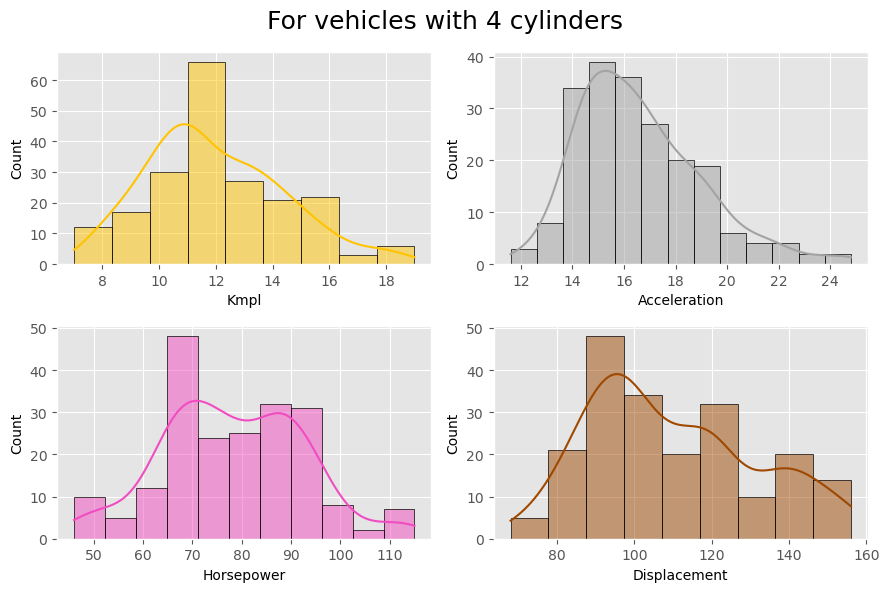

In [24]:
r = df.loc[df['cylinders'] == 4].copy() 
plt.figure(figsize=(9,6))

for i, n in enumerate(['kmpl', 'acceleration', 'horsepower', 'displacement']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=r, x=n, color=color_pal[-(i+2)], kde=True, edgecolor='black')
    plt.xlabel(n.title())
    
plt.suptitle('For vehicles with 4 cylinders', fontsize=18)
plt.tight_layout() 
plt.show()     

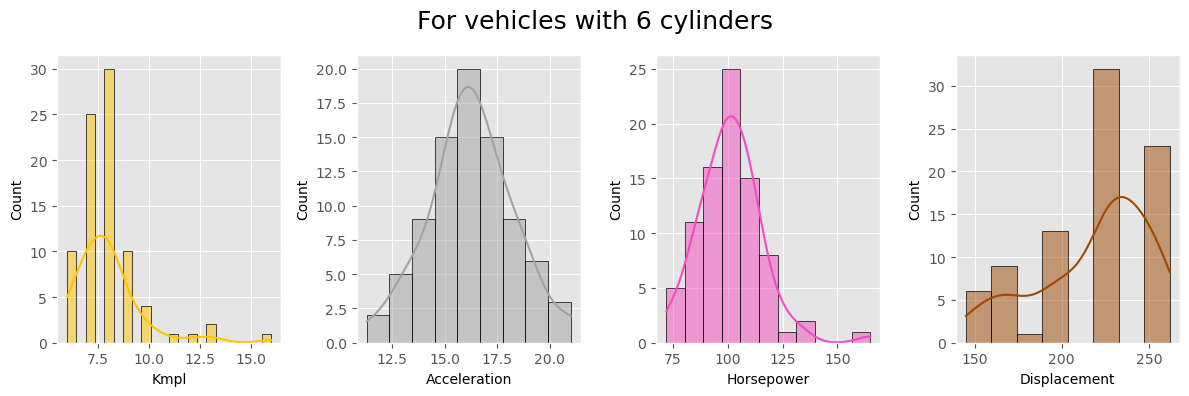

In [40]:
r = df.loc[df['cylinders'] == 6].copy() 
plt.figure(figsize=(12,4))

for i, n in enumerate(['kmpl', 'acceleration', 'horsepower', 'displacement']):
    plt.subplot(1,4,i+1)
    sns.histplot(data=r, x=n, color=color_pal[-(i+2)], kde=True, edgecolor='black')
    plt.xlabel(n.title())
    
plt.suptitle('For vehicles with 6 cylinders', fontsize=18)
plt.tight_layout() 
plt.show()  

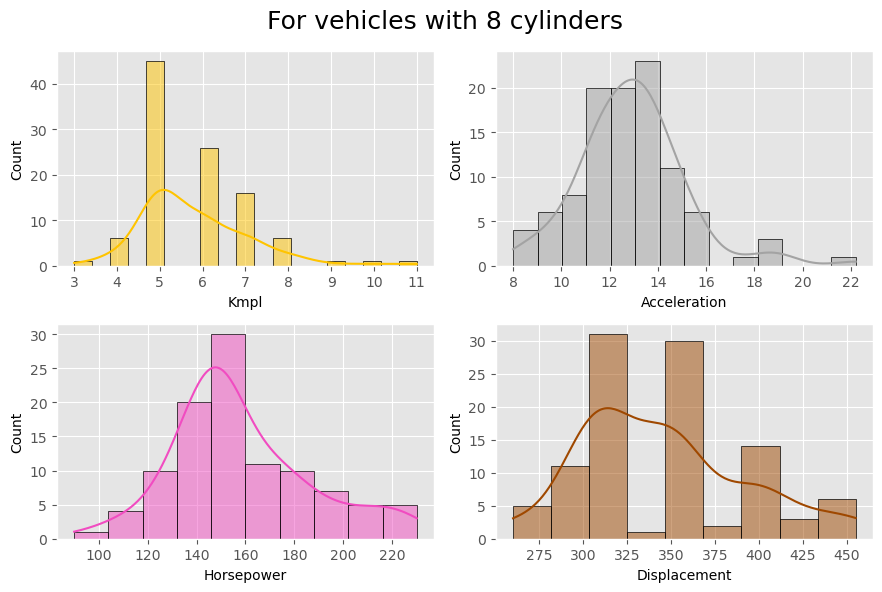

In [26]:
r = df.loc[df['cylinders'] == 8].copy() 
plt.figure(figsize=(9,6))

for i, n in enumerate(['kmpl', 'acceleration', 'horsepower', 'displacement']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=r, x=n, color=color_pal[-(i+2)], kde=True, edgecolor='black')
    plt.xlabel(n.title())
    
plt.suptitle('For vehicles with 8 cylinders', fontsize=18)
plt.tight_layout() 
plt.show()  

In [27]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [28]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company,model
0,7,8,307.0,130,1589,12.0,1970,Usa,Chevrolet,Chevelle Malibu
1,6,8,350.0,165,1675,11.5,1970,Usa,Buick,Skylark 320
2,7,8,318.0,150,1558,11.0,1970,Usa,Plymouth,Satellite
3,6,8,304.0,150,1557,12.0,1970,Usa,Amc,Rebel Sst
4,7,8,302.0,140,1564,10.5,1970,Usa,Ford,Torino


In [29]:
len(color_pal)

10

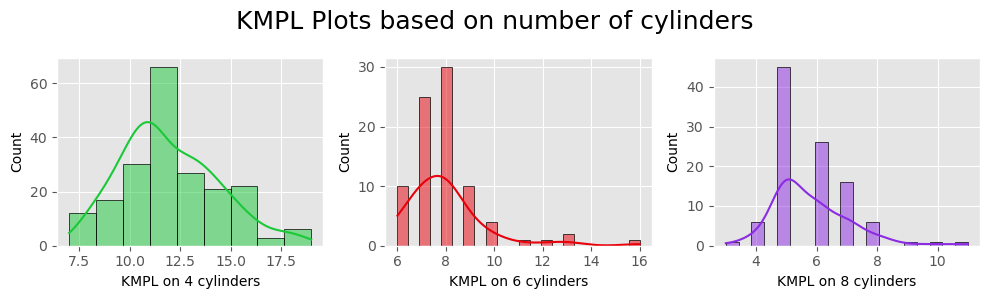

In [32]:
cylinders = [4,6,8]
plt.figure(figsize=(10,3))

for i, c in enumerate(cylinders):
    r = df.loc[df['cylinders'] == c].copy() 
    plt.subplot(1, len(cylinders), i+1)
    sns.histplot(data=r, x='kmpl', color=color_pal[i + 2], kde=True, edgecolor='black')
    plt.xlabel(f'KMPL on {c} cylinders')
    
plt.suptitle('KMPL Plots based on number of cylinders', fontsize=18)
plt.tight_layout() 
plt.show()  

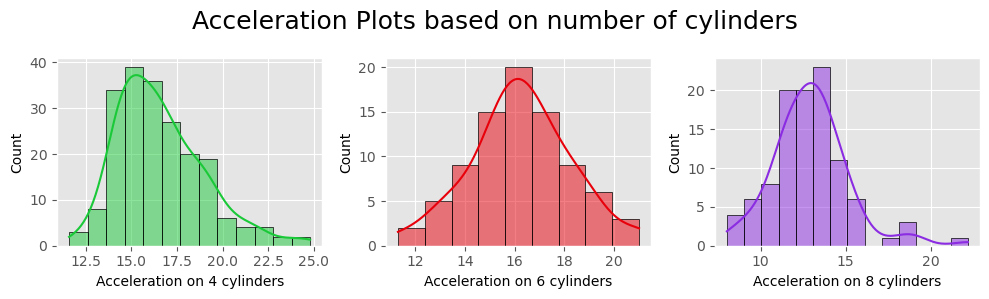

In [36]:
plt.figure(figsize=(10,3))


for i, c in enumerate(cylinders):
    r = df.loc[df['cylinders'] == c].copy() 
    plt.subplot(1, len(cylinders), i+1)
    sns.histplot(data=r, x='acceleration', color=color_pal[i + 2], kde=True, edgecolor='black')
    plt.xlabel(f'Acceleration on {c} cylinders')
    
plt.suptitle('Acceleration Plots based on number of cylinders', fontsize=18)
plt.tight_layout() 
plt.show()  

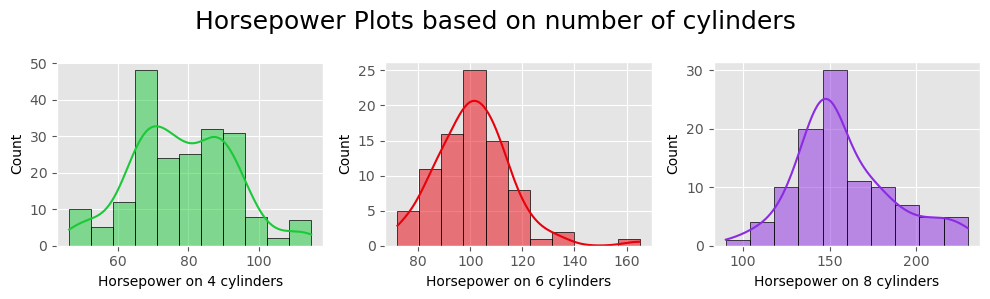

In [37]:
plt.figure(figsize=(10,3))

for i, c in enumerate(cylinders):
    r = df.loc[df['cylinders'] == c].copy() 
    plt.subplot(1, len(cylinders), i+1)
    sns.histplot(data=r, x='horsepower', color=color_pal[i + 2], kde=True, edgecolor='black')
    plt.xlabel(f'Horsepower on {c} cylinders')
    
plt.suptitle('Horsepower Plots based on number of cylinders', fontsize=18)
plt.tight_layout() 
plt.show()  

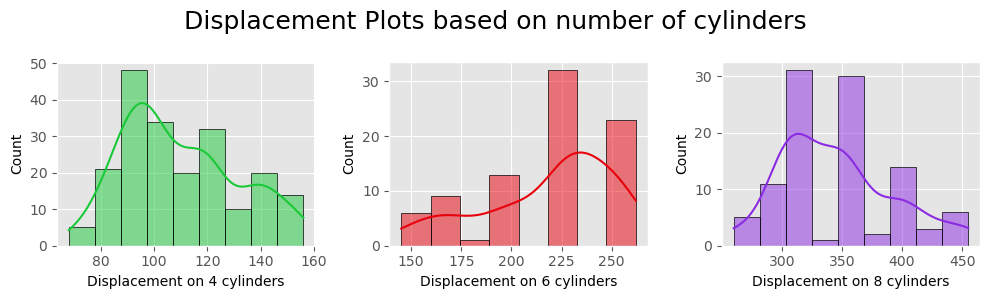

In [38]:
plt.figure(figsize=(10,3))

for i, c in enumerate(cylinders):
    r = df.loc[df['cylinders'] == c].copy() 
    plt.subplot(1, len(cylinders), i+1)
    sns.histplot(data=r, x='displacement', color=color_pal[i + 2], kde=True, edgecolor='black')
    plt.xlabel(f'Displacement on {c} cylinders')
    
plt.suptitle('Displacement Plots based on number of cylinders', fontsize=18)
plt.tight_layout() 
plt.show()  

In [41]:
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin,company,model
0,7,8,307.0,130,1589,12.0,1970,Usa,Chevrolet,Chevelle Malibu
1,6,8,350.0,165,1675,11.5,1970,Usa,Buick,Skylark 320
2,7,8,318.0,150,1558,11.0,1970,Usa,Plymouth,Satellite
3,6,8,304.0,150,1557,12.0,1970,Usa,Amc,Rebel Sst
4,7,8,302.0,140,1564,10.5,1970,Usa,Ford,Torino


<Axes: >

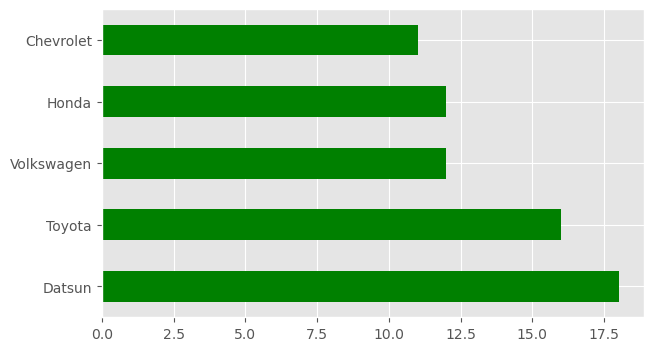

In [48]:
df[df['kmpl'] > 10]['company'].value_counts().head() \
                .plot(kind='barh', color='g', figsize=(7,4))